# Homework 4

Topic: Motion
- motion detection with Hassenstein-Rechardt detector
- motion integration with a local search method

In [147]:
# use Julia's packae managing module to activate your current environment
using Pkg
Pkg.activate(".")
import Pkg; Pkg.add("JLD2")

In [148]:
# telling Julia to load modules that we need for our code, which have been specified as dependencies for our current package
using JLD2
using Images, ImageFiltering
using Plots

## Example images

In [149]:
# Load our example stimulus
@load "./material/img.jld2"

1-element Vector{Symbol}:
 :img

A few utilities to plot the images:
- scale to range [0, 1]
- unpack series of images into one horizontal display

In [150]:
normalize(img) = (img .- minimum(img)) / (maximum(img) - minimum(img))

unroll(imgs) = Gray.(hcat([normalize(imgs[i,:,:]) for i in 1:size(imgs,1)]...))

unroll (generic function with 1 method)

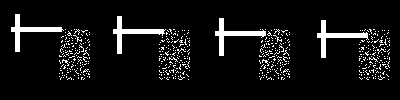

In [151]:
unroll(img)

## Task 1: Hassenstein-Reichardt Detector

### Preprocessing by on-cells

- on-cells calculate a **temporal difference**
- no spatial offset

In [152]:
function on_cells(imgs)    
    diff_imgs = diff(imgs, dims=3)
    diff_imgs = max.(diff_imgs, 0)
    return diff_imgs
end

on_cells (generic function with 1 method)

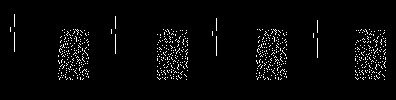

In [153]:
on = on_cells(img)
on_unrolled = unroll(on)

### Half-detectors

- half-detectors take input from on-cells
- perform a spatial shift $(\Delta x, \Delta y)$
- compare non-delayed and delayed signal

In [154]:
function half_detectors(ons, Δx, Δy, Δt)
    # shift arrays relative to each other
    # ...to be implemented:
    frames, rows, cols = size(ons)

    hd1 = zeros(frames - Δt, rows, cols)
    hd2 = zeros(frames - Δt, rows, cols)
    
    padding_vertical = (max(Δy, 0), max(Δy, 0))
    padding_horizontal = (max(Δx, 0), max(Δx, 0))
    border = Pad(:symmetric, padding_vertical[1], padding_horizontal[1])

    padded_ons = [padarray(ons[t, :, :], border) for t in 1:frames] 
    # get multiplies with both temporal offsets
    # ...to be implemented:
    for t in 1:(frames - Δt)
        current_frame = padded_ons[t][1:rows, 1:cols]
        future_frame = padded_ons[t + Δt][1:rows, 1:cols]
        hd1[t, :, :] = ons[t, :, :] .* future_frame  
        hd2[t, :, :] = ons[t + Δt, :, :] .* current_frame 
    end

    return hd1, hd2
end




half_detectors (generic function with 1 method)

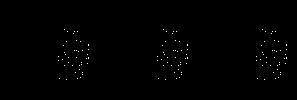

In [155]:
hd1, hd2 = half_detectors(on, 1, 1, 1)
unroll(hd1)

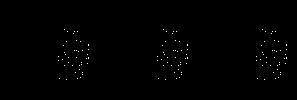

In [156]:
unroll(hd2)

### Full detectors

- full detectors take difference of two half-detectors (same spatial offset, opposite direction)

In [182]:
function full_detectors(hd1s, hd2s)
    # ...to be implemented:
    return hd1s - hd2s
end

full_detectors (generic function with 1 method)

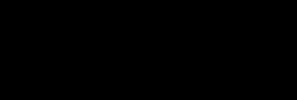

In [183]:
fd = full_detectors(hd1, hd2)
unroll(fd)

### Putting it all together

In [179]:
function hrd(imgs, Δx, Δy, Δt)
    # ...to be implemented:
    ons = on_cells(imgs)
    hd1, hd2 = half_detectors(ons, Δx, Δy, Δt)
    return full_detectors(hd1, hd2)     
end

hrd (generic function with 1 method)

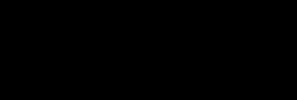

In [180]:
unroll(hrd(img, 1, 1, 1))

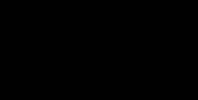

In [181]:
unroll(hrd(img, 0, 3, 2))

## Task 2: Motion Integration

- Try motion **hypotheses** (each offset in a certain range) and score their quality
- **Aggregate** quality over a local neighborhood
- Find **best** fitting direction at each location

### Help with plotting

- Again, start with a utility function (plot all motion hypotheses on 2D grid)

In [162]:
function stack4D(imgs)
    Gray.(hcat([vcat([imgs[i, j, :, :] for i in 1:size(imgs,1)]...) for j in 1:size(imgs, 2)]...))
end

stack4D (generic function with 1 method)

### Shift and compare

- Implement relative **shift** by padding
- **Compare** via square difference (lower = better)

In [163]:
function paddedcomp(img1, img2, Δx, Δy; compfun = (x, y) -> (x - y)^2)
    # Calculate padding.
    # ...to be implemented: 
    # Apply padding
    # ...to be implemented: 
    # compare element-wise
    # ...to be implemented: 
    # Select original image region from result.
    # We assume our result is anchored to img1
    # ...to be implemented: 
end

paddedcomp (generic function with 1 method)

- Perform comparison for every shift in a given range

In [164]:
function shiftcompare(img1, img2, Δxs, Δys)
    @assert size(img1) == size(img2) "img1 and img2 must be of same size"
    # ...to be implemented: 
end

shiftcompare (generic function with 1 method)

In [165]:
comp = shiftcompare(img[1,:,:], img[2,:,:], -3:3, -3:3)
stack4D(comp)

MethodError: MethodError: no method matching size(::Nothing, ::Int64)

Closest candidates are:
  size(!Matched::BitVector, ::Integer)
   @ Base bitarray.jl:107
  size(!Matched::Type{<:LinearAlgebra.Diagonal{T, StaticArraysCore.SVector{N, T}} where T}, ::Int64) where N
   @ StaticArrays ~/.julia/packages/StaticArrays/YN0oL/src/SDiagonal.jl:18
  size(!Matched::Type{<:Union{LinearAlgebra.Adjoint{T, <:Union{StaticArraysCore.StaticArray{Tuple{var"#s2"}, T, 1} where var"#s2", StaticArraysCore.StaticArray{Tuple{var"#s3", var"#s4"}, T, 2} where {var"#s3", var"#s4"}}}, LinearAlgebra.Diagonal{T, <:StaticArraysCore.StaticArray{Tuple{var"#s14"}, T, 1} where var"#s14"}, LinearAlgebra.Hermitian{T, <:StaticArraysCore.StaticArray{Tuple{var"#s11", var"#s12"}, T, 2} where {var"#s11", var"#s12"}}, LinearAlgebra.LowerTriangular{T, <:StaticArraysCore.StaticArray{Tuple{var"#s19", var"#s20"}, T, 2} where {var"#s19", var"#s20"}}, LinearAlgebra.Symmetric{T, <:StaticArraysCore.StaticArray{Tuple{var"#s8", var"#s9"}, T, 2} where {var"#s8", var"#s9"}}, LinearAlgebra.Transpose{T, <:Union{StaticArraysCore.StaticArray{Tuple{var"#s2"}, T, 1} where var"#s2", StaticArraysCore.StaticArray{Tuple{var"#s3", var"#s4"}, T, 2} where {var"#s3", var"#s4"}}}, LinearAlgebra.UnitLowerTriangular{T, <:StaticArraysCore.StaticArray{Tuple{var"#s25", var"#s26"}, T, 2} where {var"#s25", var"#s26"}}, LinearAlgebra.UnitUpperTriangular{T, <:StaticArraysCore.StaticArray{Tuple{var"#s22", var"#s23"}, T, 2} where {var"#s22", var"#s23"}}, LinearAlgebra.UpperTriangular{T, <:StaticArraysCore.StaticArray{Tuple{var"#s16", var"#s17"}, T, 2} where {var"#s16", var"#s17"}}, StaticArraysCore.StaticArray{Tuple{var"#s26"}, T, 1} where var"#s26", StaticArraysCore.StaticArray{Tuple{var"#s1", var"#s4"}, T, 2} where {var"#s1", var"#s4"}, StaticArraysCore.StaticArray{<:Tuple, T}} where T}, ::Int64)
   @ StaticArrays ~/.julia/packages/StaticArrays/YN0oL/src/abstractarray.jl:5
  ...


### Local sum

In [166]:
function localavg(comps; ksize=(5,5))
    # ...to be implemented: 
end

localavg (generic function with 1 method)

In [167]:
avg = localavg(comp);
stack4D(avg)

MethodError: MethodError: no method matching size(::Nothing, ::Int64)

Closest candidates are:
  size(!Matched::BitVector, ::Integer)
   @ Base bitarray.jl:107
  size(!Matched::Type{<:LinearAlgebra.Diagonal{T, StaticArraysCore.SVector{N, T}} where T}, ::Int64) where N
   @ StaticArrays ~/.julia/packages/StaticArrays/YN0oL/src/SDiagonal.jl:18
  size(!Matched::Type{<:Union{LinearAlgebra.Adjoint{T, <:Union{StaticArraysCore.StaticArray{Tuple{var"#s2"}, T, 1} where var"#s2", StaticArraysCore.StaticArray{Tuple{var"#s3", var"#s4"}, T, 2} where {var"#s3", var"#s4"}}}, LinearAlgebra.Diagonal{T, <:StaticArraysCore.StaticArray{Tuple{var"#s14"}, T, 1} where var"#s14"}, LinearAlgebra.Hermitian{T, <:StaticArraysCore.StaticArray{Tuple{var"#s11", var"#s12"}, T, 2} where {var"#s11", var"#s12"}}, LinearAlgebra.LowerTriangular{T, <:StaticArraysCore.StaticArray{Tuple{var"#s19", var"#s20"}, T, 2} where {var"#s19", var"#s20"}}, LinearAlgebra.Symmetric{T, <:StaticArraysCore.StaticArray{Tuple{var"#s8", var"#s9"}, T, 2} where {var"#s8", var"#s9"}}, LinearAlgebra.Transpose{T, <:Union{StaticArraysCore.StaticArray{Tuple{var"#s2"}, T, 1} where var"#s2", StaticArraysCore.StaticArray{Tuple{var"#s3", var"#s4"}, T, 2} where {var"#s3", var"#s4"}}}, LinearAlgebra.UnitLowerTriangular{T, <:StaticArraysCore.StaticArray{Tuple{var"#s25", var"#s26"}, T, 2} where {var"#s25", var"#s26"}}, LinearAlgebra.UnitUpperTriangular{T, <:StaticArraysCore.StaticArray{Tuple{var"#s22", var"#s23"}, T, 2} where {var"#s22", var"#s23"}}, LinearAlgebra.UpperTriangular{T, <:StaticArraysCore.StaticArray{Tuple{var"#s16", var"#s17"}, T, 2} where {var"#s16", var"#s17"}}, StaticArraysCore.StaticArray{Tuple{var"#s26"}, T, 1} where var"#s26", StaticArraysCore.StaticArray{Tuple{var"#s1", var"#s4"}, T, 2} where {var"#s1", var"#s4"}, StaticArraysCore.StaticArray{<:Tuple, T}} where T}, ::Int64)
   @ StaticArrays ~/.julia/packages/StaticArrays/YN0oL/src/abstractarray.jl:5
  ...


### Finding motion directions

- Find **best** (minimum difference) direction in each location
- Check whether optimum is unique

In [168]:
function uniqueminima(motions, Δxs, Δys)
    # ...to be implemented: 
    return(xs, ys, Δxₘₐₓ, Δyₘₐₓ)
end

uniqueminima (generic function with 1 method)

### Displaying the results

- Our `uniqueminima` function returns the results in the correct format for a quiver plot

In [169]:
xs, ys, Δx, Δy = uniqueminima(avg, -3:3, -3:3);

UndefVarError: UndefVarError: `xs` not defined

In [170]:
quiver(ys, 100 .- xs, quiver=(Δy, -Δx))

UndefVarError: UndefVarError: `xs` not defined